In [1]:
import datetime

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib notebook

In [3]:
day_string = '2013-01-01'
scenario_day=pd.Timestamp(day_string)
hyperrectangles_file = 'gosm_test/hyperrectangle_names_1source.dat'
dps_file = 'gosm_test/SC1_cutpoints.dat'

In [4]:
import os
os.chdir('/home/dominicyang/software/prescient/release/Prescient_2.0/sim')

In [5]:
import gosm.sources

sources = gosm.sources.sources_from_sources_file('gosm_test/bpa_sourcelist.csv')

In [6]:
windows = [source.rolling_window(scenario_day) for source in sources]

<IPython.core.display.Javascript object>


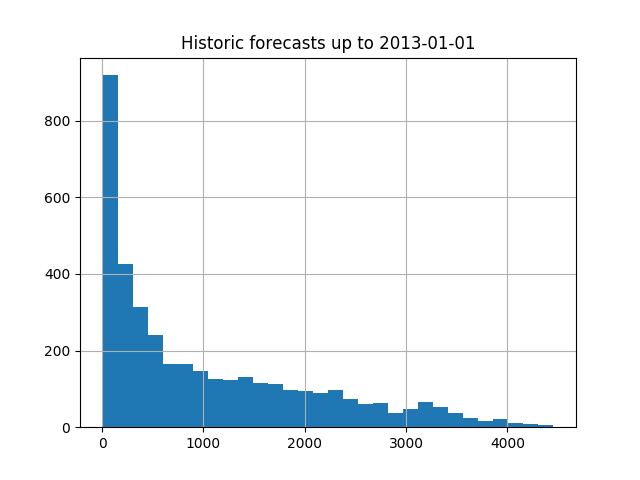

In [7]:
wind_source = windows[0]
windows[0].data.hist('forecasts', bins=30)
plt.title('Historic forecasts up to {}'.format(day_string))

In [8]:
wind_source.data['errors'] = wind_source.data['actuals'] - wind_source.data['forecasts']

In [9]:
wind_source.all_data

,actuals,errors,forecasts
datetimes,,,
2012-06-02 00:00:00,1684,-524.0,2208
2012-06-02 01:00:00,2054,-194.0,2248
2012-06-02 02:00:00,2166,-137.0,2303
2012-06-02 03:00:00,1926,-422.0,2348
2012-06-02 04:00:00,1928,-449.0,2377
2012-06-02 05:00:00,2077,-272.0,2349
2012-06-02 06:00:00,1939,-361.0,2300
2012-06-02 07:00:00,1999,-249.0,2248
2012-06-02 08:00:00,1799,-513.0,2312


<IPython.core.display.Javascript object>


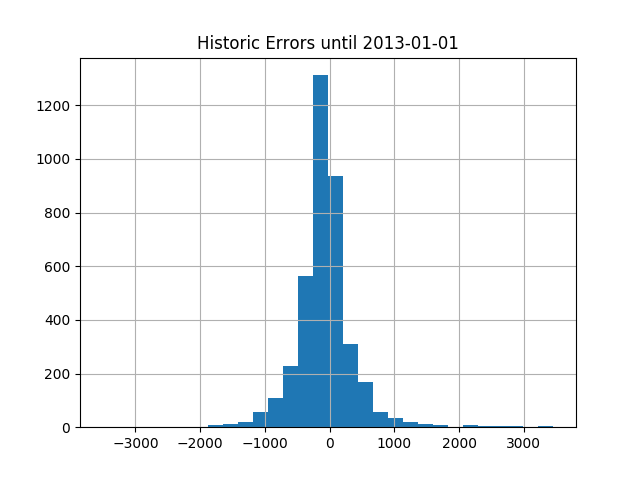

In [10]:
plt.figure()
wind_source.historic_data['errors'].hist(bins=30)
plt.title('Historic Errors until {}'.format(day_string))

<IPython.core.display.Javascript object>


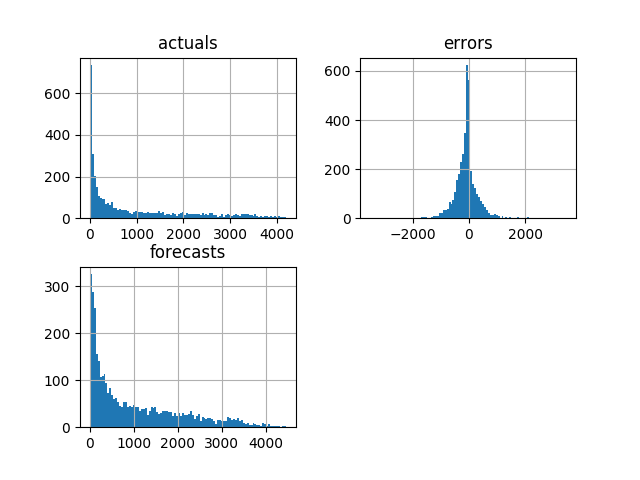

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16cf0d02b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f16cefb6550>]], dtype=object)

In [11]:
wind_source.data.hist(bins=100)

<IPython.core.display.Javascript object>


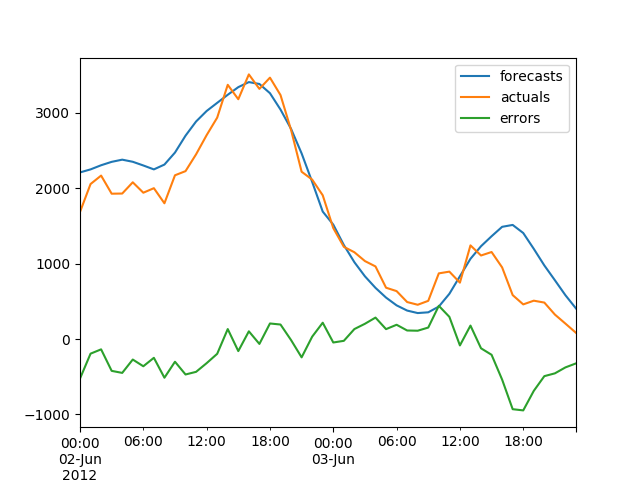

In [12]:
wind_source.data['2012-06-02':'2012-06-03'].plot()

<IPython.core.display.Javascript object>


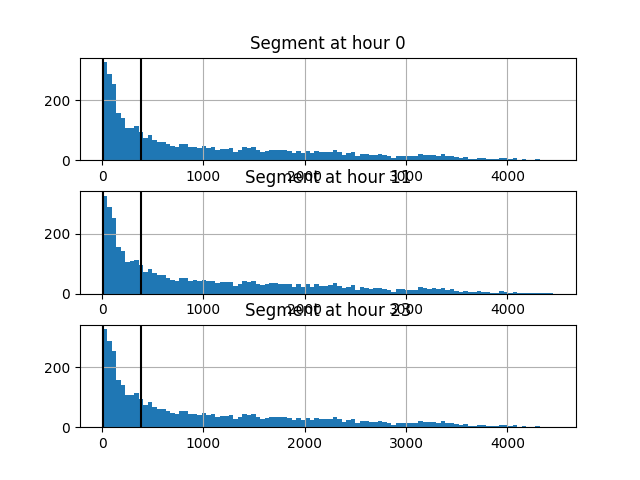

In [13]:
import gosm.skeleton_point_paths as skel_paths

dps, paths, _ = skel_paths.parse_dps_path_file(wind_source.name, dps_file)

times = [scenario_day + datetime.timedelta(hours=h) for h in dps]

segments = [wind_source.segment(time) for time in times]

def plot_segments(segments, field):
    cols = int(np.sqrt(len(segments)))
    rows = len(segments) // cols
    fig, axarr = plt.subplots(rows, cols)

    i = 0
    for ax in axarr:
        segment = segments[i]
        wind_source.data.hist(field, bins=100, ax=ax)
        ax.set_title('Segment at hour {}'.format(dps[i]))
        smallest = min(segment.data[field])
        largest = max(segment.data[field])
        ax.axvline(x=smallest, color='black')
        ax.axvline(x=largest, color='black')
        i += 1

plot_segments(segments, 'forecasts')

<IPython.core.display.Javascript object>


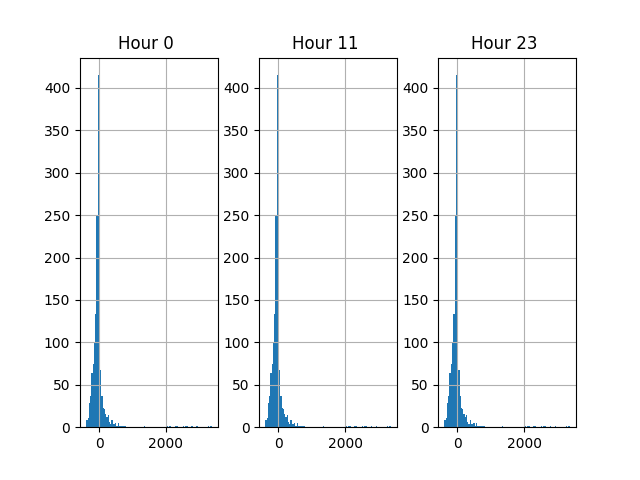

In [14]:
cols = int(np.sqrt(len(segments)))
rows = len(segments) // cols
fig, axarr = plt.subplots(cols, rows)
for ax, segment, hour in zip(axarr, segments, dps):
    segment.data.hist('errors', bins=100, ax=ax)
    ax.set_title('Hour {} '.format(hour))


In [15]:
import gosm.distributions.distributions as distributions

episplines = [distributions.UnivariateEpiSplineDistribution(
                  list(segment.data['errors']), error_distribution_domain='4')
              for segment in segments]

In [16]:
for key, value in episplines[0].__dict__.items():
    print(key, value)

beta 1162.20441713
nonlinear_solver ipopt
delta 0.05
name UnivariateEpiSplineDistribution
seg_kappa 100
specific_prob_constraint None
w0 10.634642513383715
area 2348.79983105
a {1: 97.1942646660652, 2: 99.81390464158856, 3: 99.98538670221386, 4: 99.99793093667532, 5: 99.9996249633872, 6: 99.99991620817494, 7: 99.99997748645619, 8: 99.99999273700918, 9: 99.99999707403848, 10: 99.99999842156008, 11: 99.99999753994258, 12: 99.99999137033237, 13: 99.99986972053497, 14: 3.423280019718855e-05, 15: 2.6362058612108425e-05, 16: 2.7811199656927444e-05, 17: 3.354241816708243e-05, 18: 4.4679814034833556e-05, 19: 7.189839197344698e-05, 20: 0.00021227764336939175}
u0 -48.85642405501872
dimension 1
probability_constraint_of_distributions 1
alpha -1186.59541392
seg_N 20
tau {1: 0.05, 2: 0.1, 3: 0.15000000000000002, 4: 0.2, 5: 0.25, 6: 0.30000000000000004, 7: 0.35000000000000003, 8: 0.4, 9: 0.45, 10: 0.5, 11: 0.55, 12: 0.6000000000000001, 13: 0.65, 14: 0.7000000000000001, 15: 0.75, 16: 0.8, 17: 0.85000

<IPython.core.display.Javascript object>


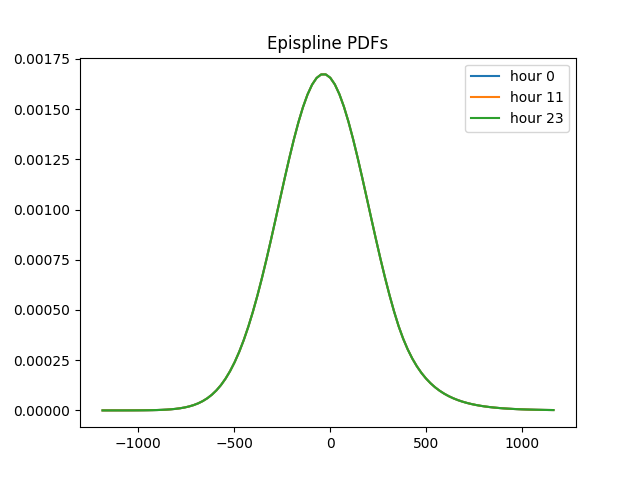

In [17]:
def plot_pdfs():
    xss = [np.linspace(epispline.alpha, epispline.beta, 100) for epispline in episplines]
    yss = [[epispline.pdf(x) for x in xs] for epispline, xs in zip(episplines, xss)] 
    
    fig, ax = plt.subplots()
    for xs, ys, hour in zip(xss, yss, dps):
        ax.plot(xs, ys, label='hour ' + str(hour))
    plt.title('Epispline PDFs')
    plt.legend()

plot_pdfs()

<IPython.core.display.Javascript object>


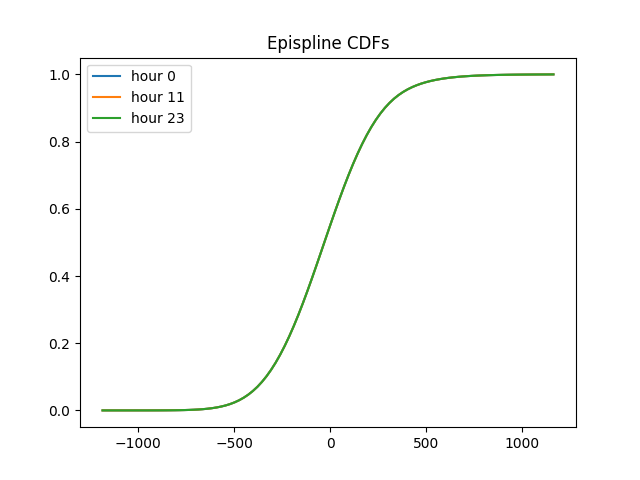

In [18]:
def plot_cdfs():
    xss = [np.linspace(epispline.alpha, epispline.beta, 100) for epispline in episplines]
    yss = [[epispline.cdf(x) for x in xs] for epispline, xs in zip(episplines, xss)] 
    
    fig, ax = plt.subplots()
    for xs, ys, hour in zip(xss, yss, dps):
        ax.plot(xs, ys, label='hour ' + str(hour))
    plt.title('Epispline CDFs')
    plt.legend()
    
plot_cdfs()

In [19]:
pattern_set = gosm.hyperrectangles.one_dimensional_pattern_set_from_file('gosm_test/hyperrectangle_names_1source.dat', 'Wind')

In [20]:
cutpoints = [0,0.1,0.9,1]

def skeleton_points(distribution, cutpoints):
    xs = [distribution.cdf_inverse(y, cdf_inverse_tolerance=1e-4, cdf_inverse_max_refinements=10) for y in cutpoints]
    points = []
    for i, (a, b) in enumerate(zip(xs, xs[1:])):
        x = distribution.region_expectation((a,b))
        points.append(x/(cutpoints[i+1] - cutpoints[i]))
    return points



In [21]:
skeletons = [skeleton_points(epispline, cutpoints) for epispline in episplines]

In [22]:
print(*skeletons, sep='\n')

[-445.9579768361767, -30.07353984663987, 428.46320645133954]
[-445.9579768361767, -30.07353984663987, 428.46320645133954]
[-445.9579768361767, -30.07353984663987, 428.46320645133954]


<IPython.core.display.Javascript object>


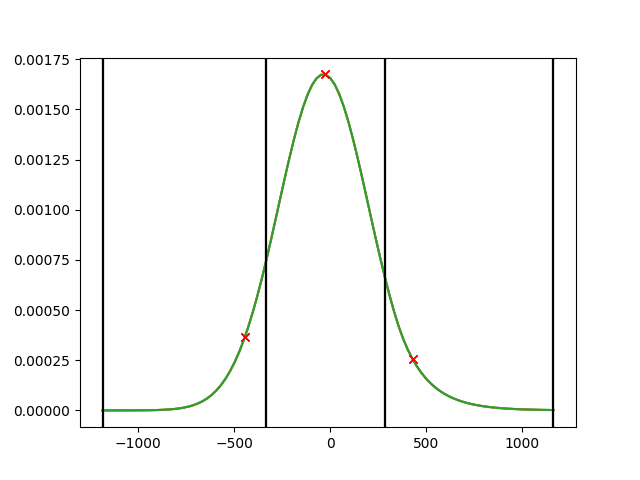

[None, None, None]

In [23]:
fig, ax = plt.subplots()
def plot_skeleton_points(distribution, cutpoints, skeleton):
    xs = [distribution.cdf_inverse(y, cdf_inverse_tolerance=1e-4, cdf_inverse_max_refinements=10) for y in cutpoints]
    xvals = np.linspace(distribution.alpha, distribution.beta, 100)
    yvals = [distribution.pdf(xval) for xval in xvals]
    

    ax.plot(xvals, yvals)
    for x in xs:
        ax.axvline(x, color='black')
    
    for skeleton_point in skeleton:
        ax.plot([skeleton_point], [distribution.pdf(skeleton_point)], 'rx')

[plot_skeleton_points(epispline, cutpoints, skeleton) for epispline, skeleton in zip(episplines, skeletons)]

In [24]:
forecasts = [wind_source.dayahead_data['forecasts'][time] for time in times]

scenarios = [[forecast + error for error in skeleton] for forecast, skeleton in zip(forecasts, skeletons)]

In [25]:
scenarios

[[-410.95797683617673, 4.9264601533601287, 463.46320645133954],
 [-430.95797683617673, -15.073539846639871, 443.46320645133954],
 [-364.95797683617673, 50.926460153360125, 509.46320645133954]]

In [26]:
skeleton_paths = []
for path in paths:
    skeleton_paths.extend(path.to_skeleton_paths(dps, pattern_set))

In [27]:
error_scenarios = []
for path in skeleton_paths:
    error_scenario = path.compute_error_vector(dict(zip(dps, episplines)))
    value, *_ = error_scenario.values()
    error_scenarios.append(value)

In [28]:
def scale(x, alpha, beta):
    return x * (beta - alpha) + alpha

In [29]:
alpha, beta = episplines[0].alpha, episplines[0].beta
from gosm.hyperrectangles import Hyperrectangle
interval = Hyperrectangle([(0, 0.1)], ['wind'])
episplines[0].conditional_expectation(interval)

-445.9579768361767

In [34]:
episplines[0].cdf_inverse(0), episplines[0].cdf_inverse(0.1)

(-1186.595413915237, -334.69672519409426)

In [36]:
gosm.gosm_options.cdf_inverse_tolerance

0.0001

In [30]:
scale(1, alpha, beta)

1162.2044171306709

In [31]:
forecasts = wind_source.dayahead_data['forecasts'][day_string].values
scenarios = (forecasts + error_scenarios).clip(min = 0)

<IPython.core.display.Javascript object>


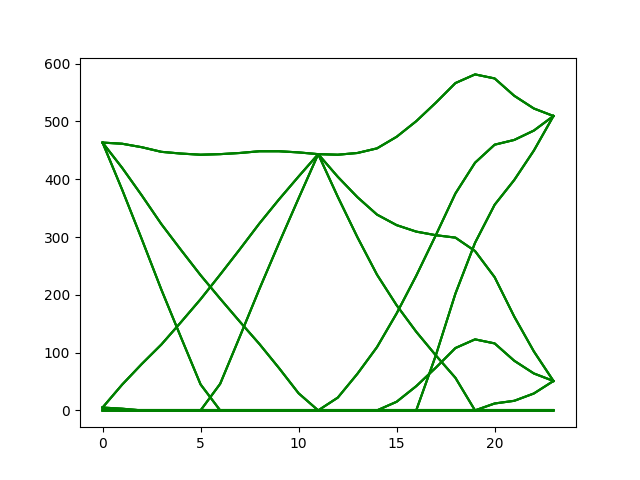

In [32]:
plt.figure()
xs = list(range(24))
for scenario in scenarios:
    scenario = scenario.clip(min=0)
    plt.plot(xs, scenario, 'g-')

In [33]:
scenarios

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
          11.95535091,   16.61238732,   29.26942374,   50.92646015],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.   